In [1]:
import catboost as cb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# 解决中文乱码问题
plt.rcParams["font.sans-serif"]=["SimHei"] 
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
Cat_train=[]
Cat_test=[]
ETR_train=[]
ETR_test=[]
RFR_train=[]
RFR_test=[]
XGB_train=[]
XGB_test=[]
LGBM_train=[]
LGBM_test=[]

In [3]:
Cat_train_1=[]
Cat_test_1=[]
ETR_train_1=[]
ETR_test_1=[]
RFR_train_1=[]
RFR_test_1=[]
XGB_train_1=[]
XGB_test_1=[]
LGBM_train_1=[]
LGBM_test_1=[]

In [4]:
data=pd.read_csv('./use.csv')
for i in range(9):
    train_data,test_data=train_test_split(data,test_size=(9-i)/10, random_state=1112)
    feature=train_data.drop(['Sel','Unnamed: 0'],axis=1)
    label=train_data['Sel']
    test_x = test_data.drop(['Sel','Unnamed: 0'],axis=1)
    test_y = test_data['Sel']
    kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)
    model = cb.CatBoostRegressor(iterations=2000,max_depth=7,l2_leaf_reg=3.34534912107800673,
                             subsample=0.6,silent=True,random_state=1314,learning_rate=0.140355596209433626).fit(X=feature , y=label)
    Cat_test.append(r2_score(test_y,model.predict(test_x)))
    Cat_train.append(r2_score(label,model.predict(feature)))
    Cat_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    Cat_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = ExtraTreesRegressor(n_estimators=1000,
                            # max_depth=26,
                            # min_samples_split=4,
                            # max_samples=105,
                            max_leaf_nodes=10000,
                            # bootstrap=True,
                            random_state=1314).fit(X=feature , y=label)
    ETR_test.append(r2_score(test_y,model.predict(test_x)))
    ETR_train.append(r2_score(label,model.predict(feature)))
    ETR_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    ETR_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = RandomForestRegressor(n_estimators=1000,
                              max_depth=23,
                              max_features=45,
                              random_state=1314).fit(X=feature , y=label)
    RFR_test.append(r2_score(test_y,model.predict(test_x)))
    RFR_train.append(r2_score(label,model.predict(feature)))
    RFR_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    RFR_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = XGBRegressor(n_estimators=2500,random_state=1314,booster='gbtree',
                     colsample_bytree=0.60001035861683351,
                     subsample=0.400039396721098,
                     reg_lambda=2.103934466385165,
                     max_depth=14,
                     learning_rate=0.100650975730649694).fit(X=feature , y=label)
    XGB_test.append(r2_score(test_y,model.predict(test_x)))
    XGB_train.append(r2_score(label,model.predict(feature)))
    XGB_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    XGB_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    model = lgb.LGBMRegressor(random_state=1314,iterations=500,verbose=-1,
                        #   max_depth=21,
                        #   colsample_bytree=0.6996018516903802,subsample=0.360500873673603,
                          lambda_l2=3.6696821767896,learning_rate= 0.4135020975900916).fit(X=feature , y=label)
    LGBM_test.append(r2_score(test_y,model.predict(test_x)))
    LGBM_train.append(r2_score(label,model.predict(feature)))
    LGBM_test_1.append(pow(mean_squared_error(test_y,model.predict(test_x)),0.5))
    LGBM_train_1.append(pow(mean_squared_error(label,model.predict(feature)),0.5))
    

In [5]:
D_1=pd.DataFrame([Cat_train,Cat_test,ETR_train,ETR_test,RFR_train,RFR_test,XGB_train,XGB_test,LGBM_train,LGBM_test],
                 index=['Cat_train','Cat_test','ETR_train','ETR_test','RFR_train','RFR_test','XGB_train','XGB_test','LGBM_train','LGBM_test'],
                 columns=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])
D_2=pd.DataFrame([Cat_train_1,Cat_test_1,ETR_train_1,ETR_test_1,RFR_train_1,RFR_test_1,XGB_train_1,XGB_test_1,LGBM_train_1,LGBM_test_1],
                 index=['Cat_train','Cat_test','ETR_train','ETR_test','RFR_train','RFR_test','XGB_train','XGB_test','LGBM_train','LGBM_test'],
                 columns=['0.1','0.2','0.3','0.4','0.5','0.6','0.7','0.8','0.9'])

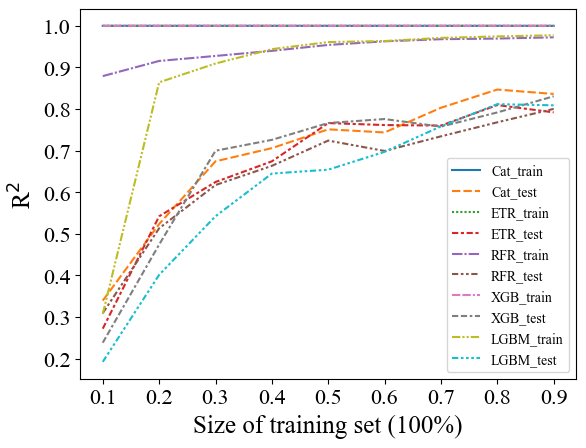

In [6]:
import seaborn as sns
from pathlib import Path
sns.lineplot(data=D_1.T)
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.xlabel('Size of training set (100%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('R$^2$',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
#plt.text(4,0.1,'R$^2$',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.legend(prop=Path('..\TimesNewRoman.ttf'))
plt.show()

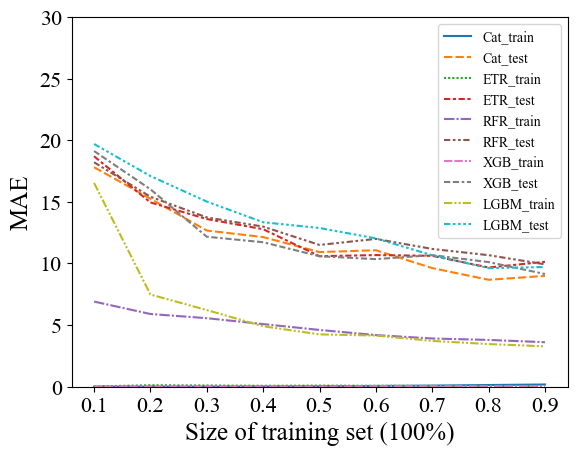

In [7]:
import seaborn as sns
sns.lineplot(data=D_2.T)
plt.yticks(fontsize=16,fontname='Times New Roman')
plt.xticks(fontsize=16,fontname='Times New Roman')
plt.ylim(0,30)
plt.xlabel('Size of training set (100%)',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.ylabel('MAE',fontsize=18,font=Path('..\TimesNewRoman.ttf'))
plt.legend(prop=Path('..\TimesNewRoman.ttf'))
plt.show()